# Analysis Question 2: What industries are more impacted by ESG related factors?

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [92]:
# reading in the data frame 
data = pd.read_csv('Model_CSV.csv')

# remapping  ESG risk levels into binary labels: 0 = Low risk, 1 = High risk
data["ESG_label"] = data["ESG risk"].map({
    "Negligible": 0,
    "Low": 0,
    "Medium": 0,
    "High": 1,
    "Severe": 1
})

data

# if needed taking out outliers 
# outliers_trimmed = data_sorted.iloc[77:]
# outlier_count2 = count_outliers2(outliers_trimmed['Revenue (TTM)'])
# outlier_count2

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk,ESG_label
0,MMM,3M Company,17.295145,17.579748,2.451300e+10,1.010200e+10,4.420000e+09,5.189000e+09,7.474258e+10,Industrials,43.0,Severe,1
1,AOS,A.O. Smith Corporation,17.988981,16.044226,3.818100e+09,1.456100e+09,5.336000e+08,7.775000e+08,9.372444e+09,Industrials,26.8,Medium,0
2,ABT,Abbott Laboratories,16.912418,25.073645,4.234400e+10,2.367800e+10,1.345100e+10,1.100250e+10,2.243860e+11,Healthcare,20.4,Medium,0
3,ABBV,AbbVie Inc.,75.154160,14.869744,5.633400e+10,3.964500e+10,4.238000e+09,2.671800e+10,3.190710e+11,Healthcare,24.3,Medium,0
4,ACN,Accenture plc,24.043730,20.711443,6.722149e+10,2.163372e+10,7.683453e+09,1.147250e+10,1.824300e+11,Technology,11.1,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,XYL,Xylem Inc.,31.673971,24.338947,8.562000e+09,3.212000e+09,8.900000e+08,1.683000e+09,2.813358e+10,Industrials,22.9,Medium,0
439,YUM,"Yum! Brands, Inc.",28.272032,24.273027,7.549000e+09,3.584000e+09,1.486000e+09,2.714000e+09,4.110354e+10,Consumer Cyclical,20.5,Medium,0
440,ZBRA,Zebra Technologies Corporation,23.976423,15.216957,4.981000e+09,2.413000e+09,5.280000e+08,9.370000e+08,1.248306e+10,Technology,9.9,Negligible,0
441,ZBH,"Zimmer Biomet Holdings, Inc.",22.911964,11.802325,7.678600e+09,5.498900e+09,9.038000e+08,2.590300e+09,2.008086e+10,Healthcare,26.2,Medium,0


# Hypothesis testing 
Null Hypothesis: The industry the company is in does not impact the ESG score.

Alternative Hypothesis: The industry the company is in does impact the ESG score.

We think that some industries (such as energy, manufacturing, and agriculture) may be more directly affected by environmental and social concerns, while others may not see as pronounced an impact.

# Univariate testing 

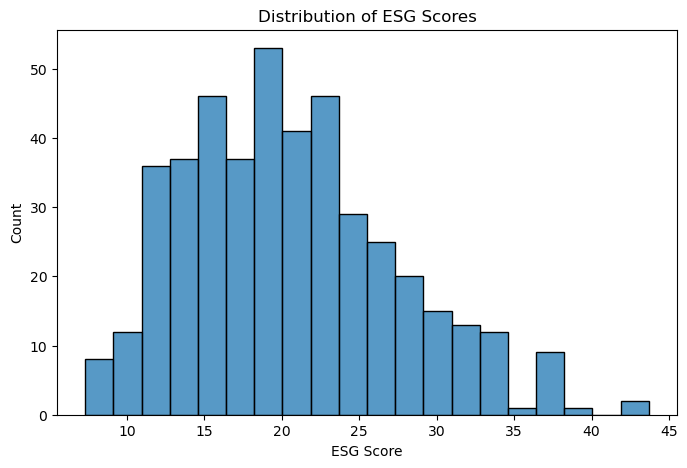

In [96]:
# Distribution of ESG scores 
plt.figure(figsize=(8, 5))
sns.histplot(data['ESG score'], bins=20)
plt.title('Distribution of ESG Scores')
plt.xlabel('ESG Score')
plt.ylabel('Count')
plt.show()

#### Another Univariate Depiction 

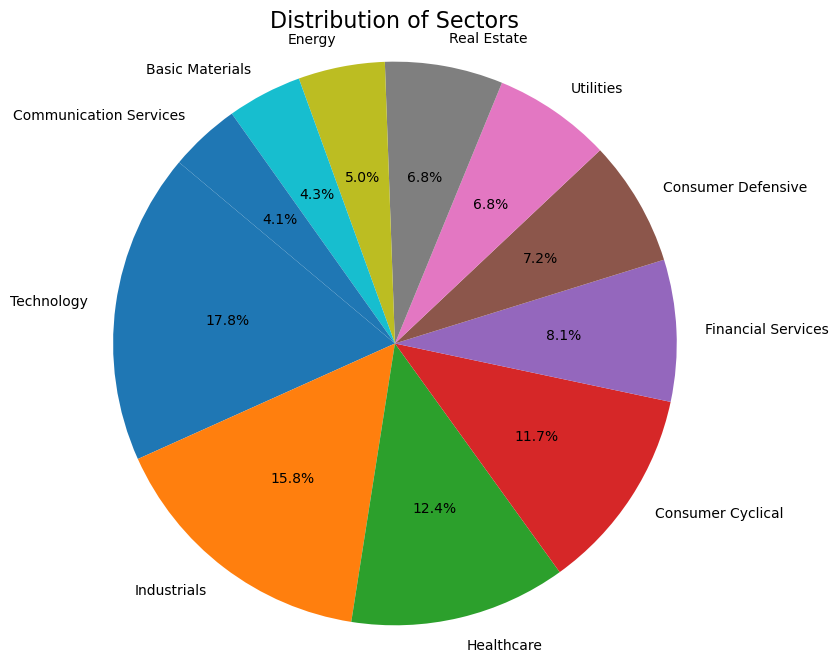

In [99]:
# getting frequency count of each sector 
sectors = data['Sector'].value_counts()

# Pie chart of distribution of sectors 
plt.figure(figsize=(8, 8))
plt.pie(sectors, labels=sectors.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Sectors", fontsize=16)
plt.axis('equal')  
plt.show()

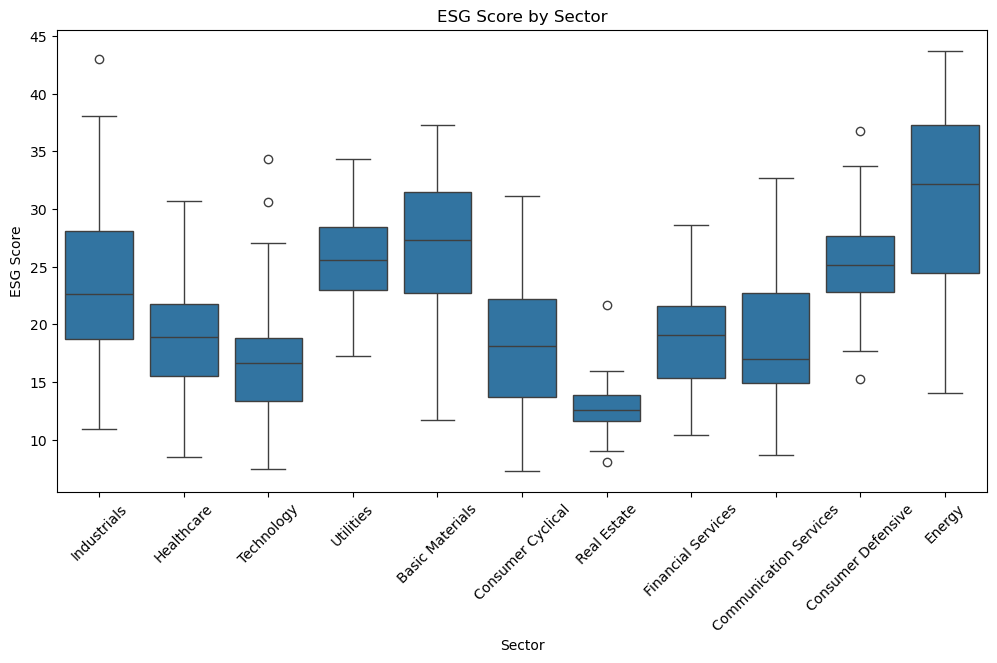

In [101]:
# ESG Score by Sector
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='ESG score', data=data)
plt.xticks(rotation=45)
plt.title('ESG Score by Sector')
plt.xlabel('Sector')
plt.ylabel('ESG Score')
plt.show()

# Bivariate Testing 

In [104]:
# looking at the correlation between esg score per industry and revenue
correlations = data.groupby('Sector').apply(
    lambda g: g[['ESG score', 'Revenue (TTM)']].corr(method='pearson').iloc[0, 1]
)

display(correlations)

/var/folders/w8/48w65ct56095y75y6ch9wfjw0000gn/T/ipykernel_41501/2100717.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = data.groupby('Sector').apply(


Sector
Basic Materials          -0.396115
Communication Services    0.627593
Consumer Cyclical         0.277193
Consumer Defensive       -0.020277
Energy                    0.391844
Financial Services        0.044544
Healthcare               -0.323103
Industrials               0.210548
Real Estate              -0.312380
Technology               -0.056292
Utilities                 0.226166
dtype: float64

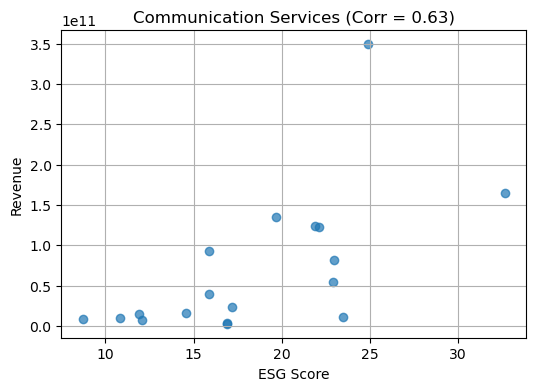

In [106]:
high_corr_sectors = correlations[abs(correlations) > 0.5].index.tolist()

# Plot scatterplots for highly correlated sectors
for sector in high_corr_sectors:
    sector_data = data[data['Sector'] == sector].dropna(subset=['ESG score', 'Revenue (TTM)'])
    
    plt.figure(figsize=(6, 4))
    plt.scatter(sector_data['ESG score'], sector_data['Revenue (TTM)'], alpha=0.7)
    plt.title(f"{sector} (Corr = {correlations[sector]:.2f})")
    plt.xlabel('ESG Score')
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()

In [108]:
# looking at correlation between esg score per industry and market cap
correlations = data.groupby('Sector').apply(
    lambda g: g[['ESG score', 'Market Cap']].corr(method='pearson').iloc[0, 1]
)

display(correlations)

/var/folders/w8/48w65ct56095y75y6ch9wfjw0000gn/T/ipykernel_41501/3090073463.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = data.groupby('Sector').apply(


Sector
Basic Materials          -0.563934
Communication Services    0.618071
Consumer Cyclical         0.246049
Consumer Defensive        0.026031
Energy                    0.399331
Financial Services       -0.307633
Healthcare                0.081791
Industrials               0.150243
Real Estate              -0.094209
Technology               -0.012994
Utilities                 0.079067
dtype: float64

# Descriptive Statistics 

In [111]:
data.groupby('Sector')['ESG score'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Basic Materials,19.0,26.273684,6.659650,11.7,22.700,27.30,31.450,37.3
Communication Services,18.0,18.422222,5.982578,8.7,14.925,17.05,22.700,32.7
Consumer Cyclical,52.0,18.184615,5.672928,7.3,13.675,18.10,22.200,31.1
Consumer Defensive,32.0,25.412500,4.668822,15.3,22.775,25.15,27.675,36.8
Energy,22.0,30.404545,8.005027,14.1,24.450,32.20,37.300,43.7
Financial Services,36.0,19.088889,4.086338,10.4,15.400,19.10,21.600,28.6
Healthcare,55.0,18.765455,4.988885,8.5,15.500,18.90,21.800,30.7
Industrials,70.0,23.504286,6.422818,10.9,18.725,22.60,28.075,43.0
Real Estate,30.0,12.953333,2.421275,8.1,11.625,12.60,13.875,21.7


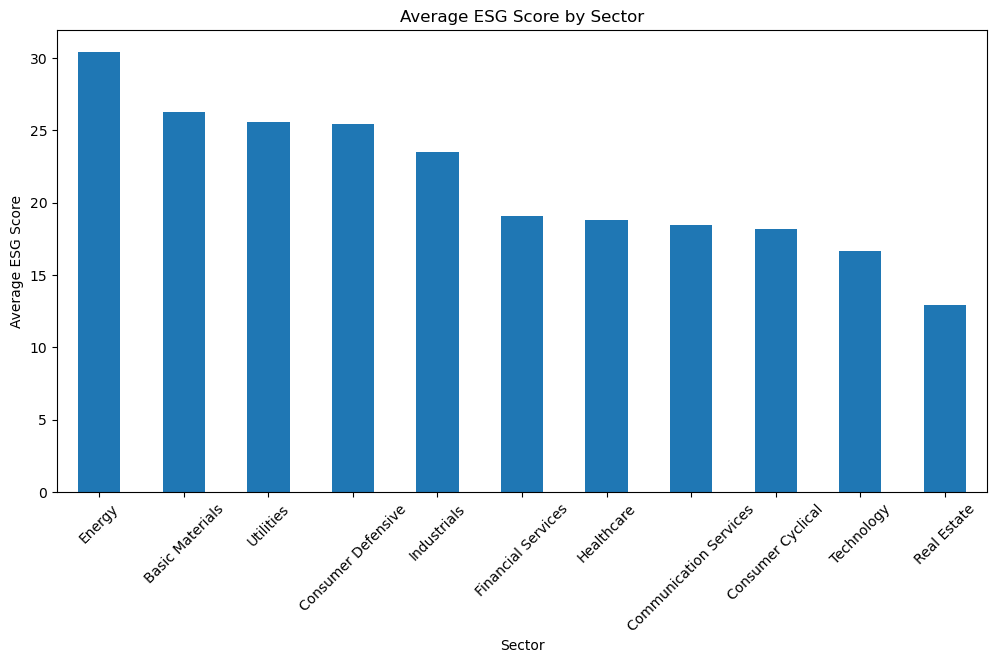

In [113]:
# grouping by sector and calculating the mean ESG score
avg_esg_by_sector = data.groupby('Sector')['ESG score'].mean().sort_values(ascending=False)

# plot 
plt.figure(figsize=(12, 6))
avg_esg_by_sector.plot(kind='bar')
plt.title('Average ESG Score by Sector')
plt.xlabel('Sector')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=45)
plt.show()

# Machine Learning 

In [116]:
# running a logistic regression by sector
for sector, group in data.groupby('Sector'):
    
    X = group[['P/E Ratio', 'Revenue (TTM)', 'Gross Profits', 'Net Income', 'EBITDA', 'Market Cap']] 
    y = group['ESG_label']
    
    # Count the number of 0s and 1s
    esg_label_counts = y.value_counts().to_dict()

    # Need both the 0 and 1 to run a logistic regression so the y.unique takes out the ones that ONLY have 0s or 1s
    if y.nunique() > 1:
        model = LogisticRegression()
        model.fit(X, y)

        print(f"Sector: {sector}")
        print(f"  ESG Label Counts: {esg_label_counts}")  
        print(f"  Coefficients: {model.coef_}")
        print(f"  Intercept: {model.intercept_}")
        print(f"  Accuracy: {model.score(X, y):.2f}\n")
    else:
        print(f"Sector: {sector} — Skipped (only class {y.unique()[0]})\n")

Sector: Basic Materials
  ESG Label Counts: {0: 13, 1: 6}
  Coefficients: [[ 4.94745911e-19  1.41004239e-11  7.23664958e-11  2.96145072e-10
  -1.20344849e-10 -5.23486162e-11]]
  Intercept: [1.81373459e-18]
  Accuracy: 0.68

Sector: Communication Services
  ESG Label Counts: {0: 17, 1: 1}
  Coefficients: [[-2.95602172e-15 -1.56335050e-08  6.81657340e-09  7.75292847e-09
   7.07728943e-09  4.49536592e-10]]
  Intercept: [-2.79933953e-18]
  Accuracy: 1.00

Sector: Consumer Cyclical
  ESG Label Counts: {0: 51, 1: 1}
  Coefficients: [[ 1.08132498e-15 -5.90043503e-12 -2.34443679e-09  3.79538986e-09
  -1.11386453e-09  3.08131427e-11]]
  Intercept: [3.63356598e-17]
  Accuracy: 0.98

Sector: Consumer Defensive
  ESG Label Counts: {0: 27, 1: 5}
  Coefficients: [[-4.37545656e-17  6.23197080e-11 -1.40387548e-09 -6.22015045e-10
   1.70361116e-09  2.65774772e-11]]
  Intercept: [-1.56025164e-18]
  Accuracy: 0.81

Sector: Energy
  ESG Label Counts: {1: 14, 0: 8}
  Coefficients: [[ 9.38368395e-17 -1.5743

#### as you can see with the accuracys that the model is really good at predicting when there are high amounts of one label and low of the other

In [119]:
# Decision Tree by Sector
for sector, group in data.groupby('Sector'):

    X = group[['P/E Ratio', 'Revenue (TTM)', 'Gross Profits', 'Net Income', 'EBITDA', 'Market Cap']] 
    y = group['ESG_label']
    
    esg_label_counts = y.value_counts().to_dict()

    if y.nunique() > 1:
        model = DecisionTreeClassifier(max_depth=3, random_state=42)
        model.fit(X, y)

        print(f"Sector: {sector}")
        print(f"  ESG Label Counts: {esg_label_counts}")
        print(f"  Tree Depth: {model.get_depth()}")
        print(f"  Accuracy: {model.score(X, y):.2f}\n")
    else:
        print(f"Sector: {sector} — Skipped (only class {y.unique()[0]})\n")

Sector: Basic Materials
  ESG Label Counts: {0: 13, 1: 6}
  Tree Depth: 3
  Accuracy: 0.95

Sector: Communication Services
  ESG Label Counts: {0: 17, 1: 1}
  Tree Depth: 2
  Accuracy: 1.00

Sector: Consumer Cyclical
  ESG Label Counts: {0: 51, 1: 1}
  Tree Depth: 1
  Accuracy: 1.00

Sector: Consumer Defensive
  ESG Label Counts: {0: 27, 1: 5}
  Tree Depth: 3
  Accuracy: 0.97

Sector: Energy
  ESG Label Counts: {1: 14, 0: 8}
  Tree Depth: 3
  Accuracy: 0.86

Sector: Financial Services — Skipped (only class 0)

Sector: Healthcare
  ESG Label Counts: {0: 54, 1: 1}
  Tree Depth: 2
  Accuracy: 1.00

Sector: Industrials
  ESG Label Counts: {0: 57, 1: 13}
  Tree Depth: 3
  Accuracy: 0.90

Sector: Real Estate — Skipped (only class 0)

Sector: Technology
  ESG Label Counts: {0: 77, 1: 2}
  Tree Depth: 2
  Accuracy: 1.00

Sector: Utilities
  ESG Label Counts: {0: 26, 1: 4}
  Tree Depth: 3
  Accuracy: 0.93



#### Here we are still seeing something similar 

<Axes: >

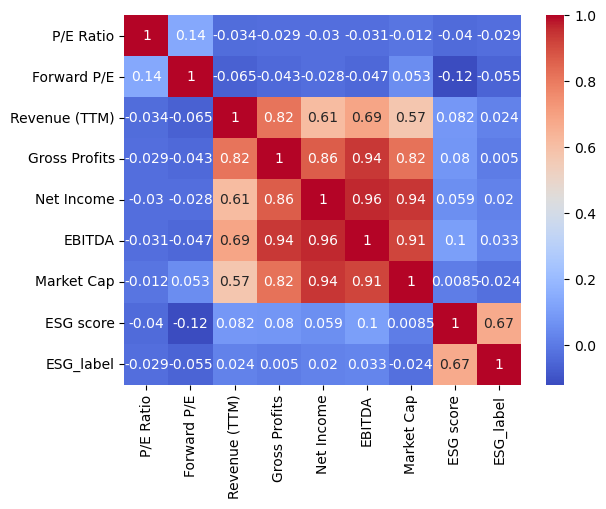

In [122]:
# running a heat map to see colinearity
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Now we are going to run a linear Regression for each sector, but we are going to skip sectors with too few rows or no variation in their ESG scores 

### Based on the correlation matrix above we decided to be taking out variables that had colinearity. We chose to take out Market Cap, Gross Profits, and EBITDA.

Sector: Basic Materials
  R^2 Score: 0.43
  Mean Squared Error: 23.74
  Coefficients: {'P/E Ratio': -0.06334670081482861, 'Forward P/E': -0.06661121420965983, 'Revenue (TTM)': -1.3447283976032864e-10, 'Net Income': -2.2479316841233226e-09}



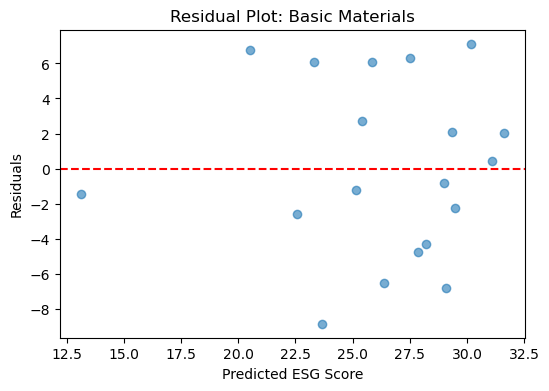

Sector: Communication Services
  R^2 Score: 0.50
  Mean Squared Error: 16.99
  Coefficients: {'P/E Ratio': -7.771416583647355e-06, 'Forward P/E': 0.07718081294824741, 'Revenue (TTM)': 3.893375805750904e-11, 'Net Income': 3.424194254874337e-11}



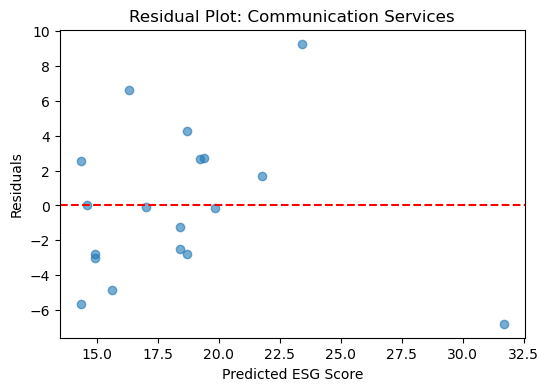

Sector: Consumer Cyclical
  R^2 Score: 0.11
  Mean Squared Error: 28.10
  Coefficients: {'P/E Ratio': -0.03690858973910542, 'Forward P/E': 0.13270434262324204, 'Revenue (TTM)': 4.2168820709156504e-11, 'Net Income': -3.174865667875622e-10}



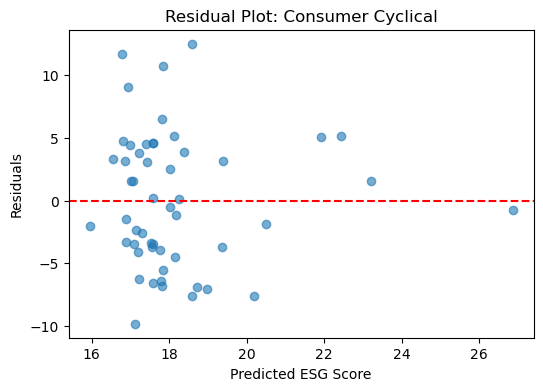

Sector: Consumer Defensive
  R^2 Score: 0.08
  Mean Squared Error: 19.48
  Coefficients: {'P/E Ratio': -0.01350203324191288, 'Forward P/E': 0.11400141151459177, 'Revenue (TTM)': -3.098213302193696e-12, 'Net Income': -2.4265782285647976e-11}



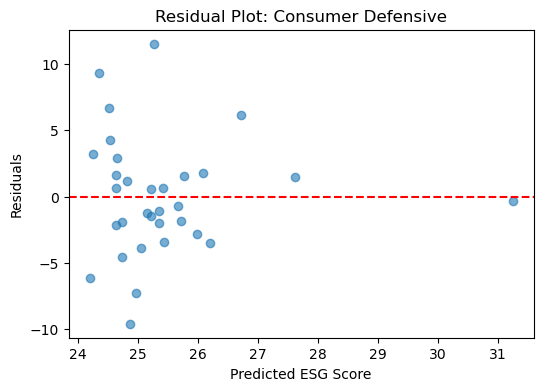

Sector: Energy
  R^2 Score: 0.28
  Mean Squared Error: 44.09
  Coefficients: {'P/E Ratio': -0.02939817105649753, 'Forward P/E': -0.3601591357575555, 'Revenue (TTM)': 1.8333252735581498e-12, 'Net Income': 4.187300205888854e-10}



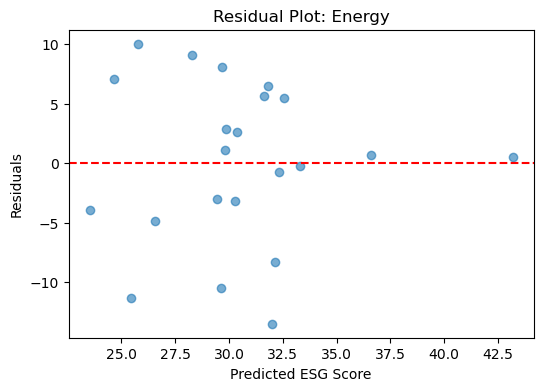

Sector: Financial Services
  R^2 Score: 0.20
  Mean Squared Error: 12.94
  Coefficients: {'P/E Ratio': -0.22172308322607903, 'Forward P/E': 0.20790267124251138, 'Revenue (TTM)': 2.311066432072341e-11, 'Net Income': -2.985923753198531e-10}



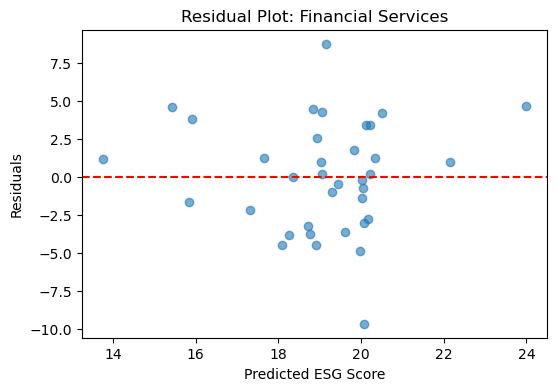

Sector: Healthcare
  R^2 Score: 0.13
  Mean Squared Error: 21.20
  Coefficients: {'P/E Ratio': 0.0025686463967970713, 'Forward P/E': -0.05198721435641499, 'Revenue (TTM)': -1.9448243298803734e-11, 'Net Income': 1.1292742043870743e-10}



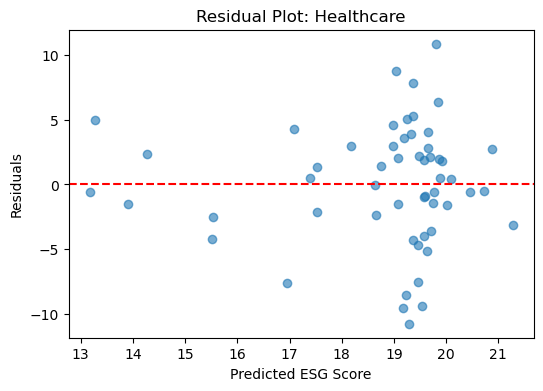

Sector: Industrials
  R^2 Score: 0.06
  Mean Squared Error: 38.04
  Coefficients: {'P/E Ratio': 0.11561498773076558, 'Forward P/E': -0.13461519087096666, 'Revenue (TTM)': 1.9852066193358426e-11, 'Net Income': 6.602282843470812e-10}



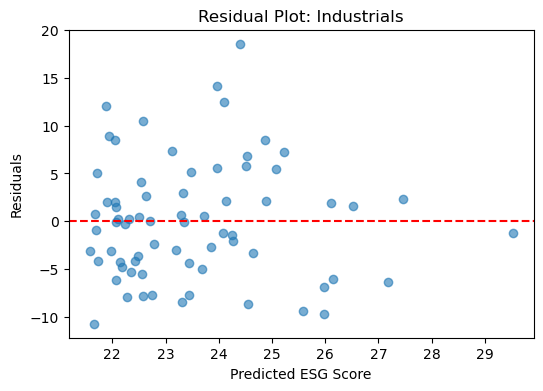

Sector: Real Estate
  R^2 Score: 0.14
  Mean Squared Error: 4.90
  Coefficients: {'P/E Ratio': 0.001573644172624029, 'Forward P/E': -0.004508374616834025, 'Revenue (TTM)': -1.078786117816416e-10, 'Net Income': -3.9060067087105475e-10}



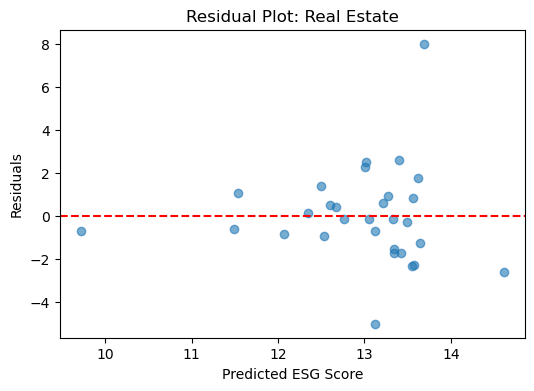

Sector: Technology
  R^2 Score: 0.04
  Mean Squared Error: 20.13
  Coefficients: {'P/E Ratio': -0.003217964815083771, 'Forward P/E': 0.03720710974601379, 'Revenue (TTM)': -1.4352255001652387e-11, 'Net Income': 3.554603881333621e-11}



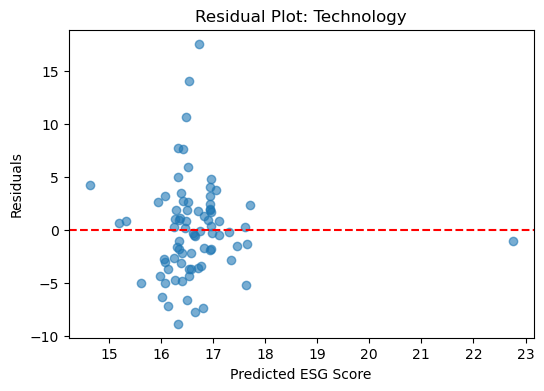

Sector: Utilities
  R^2 Score: 0.09
  Mean Squared Error: 17.10
  Coefficients: {'P/E Ratio': -0.0753092961218621, 'Forward P/E': 0.15538673724792434, 'Revenue (TTM)': 2.7953031162878087e-10, 'Net Income': -1.1192229689133822e-09}



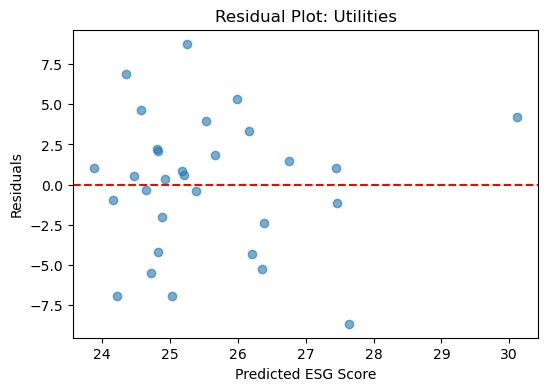

In [130]:
# looping through each sector 
for sector, group in data.groupby('Sector'):
    
    # defining x and y 
    X = group[['P/E Ratio', 'Forward P/E', 'Revenue (TTM)', 'Net Income']]
    y = group['ESG score']
    
    # making sure there is enough rows/data and running the model 
    if len(group) >= 5 and y.nunique() > 1:
        model = LinearRegression()
        model.fit(X, y)
        
        y_pred = model.predict(X)
        residuals = y - y_pred # getting residuals/errors 
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        
        print(f"Sector: {sector}")
        print(f"  R^2 Score: {r2:.2f}")
        print(f"  Mean Squared Error: {mse:.2f}")
        print(f"  Coefficients: {dict(zip(X.columns, model.coef_))}\n")

        # plotting the residuals for each sector 
        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f'Residual Plot: {sector}')
        plt.xlabel('Predicted ESG Score')
        plt.ylabel('Residuals')
        plt.show()

    else:
        print(f"Sector: {sector} — Skipped (insufficient or constant target data)\n")

### In an effort to improve the R^2 we are going to input regularization 

Sector: Basic Materials
  R^2 Score: 0.43
  Mean Squared Error: 23.74
  Coefficients: {'P/E Ratio': -0.06334964037824975, 'Forward P/E': -0.0665076149047073, 'Revenue (TTM)': -1.3444593590482084e-10, 'Net Income': -2.248165978848449e-09}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.18972e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


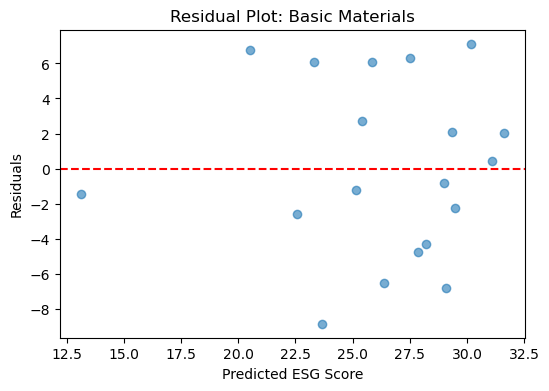

Sector: Communication Services
  R^2 Score: 0.50
  Mean Squared Error: 16.99
  Coefficients: {'P/E Ratio': -7.743610945157595e-06, 'Forward P/E': 0.07717186870163693, 'Revenue (TTM)': 3.8932158475654805e-11, 'Net Income': 3.424586998822464e-11}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.14974e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


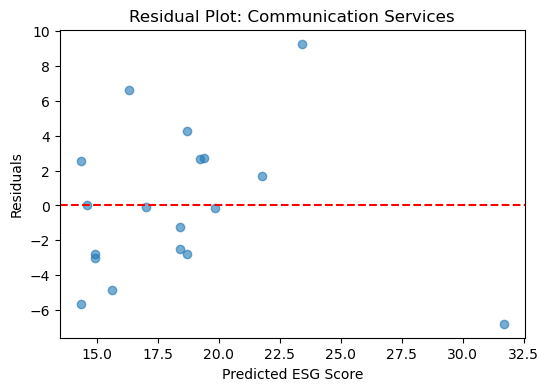

Sector: Consumer Cyclical
  R^2 Score: 0.11
  Mean Squared Error: 28.10
  Coefficients: {'P/E Ratio': -0.03681884503028848, 'Forward P/E': 0.13254418876369228, 'Revenue (TTM)': 4.215921281114532e-11, 'Net Income': -3.1736362584962553e-10}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.25994e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


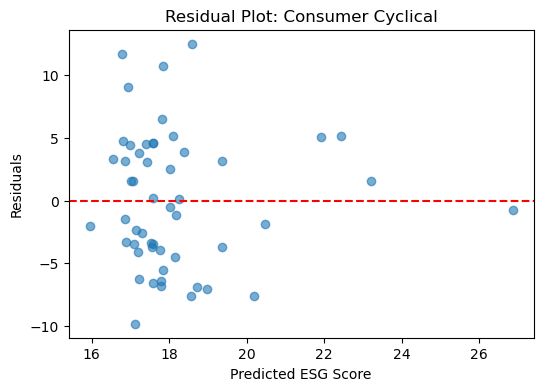

Sector: Consumer Defensive
  R^2 Score: 0.08
  Mean Squared Error: 19.48
  Coefficients: {'P/E Ratio': -0.01347989830446761, 'Forward P/E': 0.1139663704089641, 'Revenue (TTM)': -3.0980875334575905e-12, 'Net Income': -2.425634914597824e-11}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.92167e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


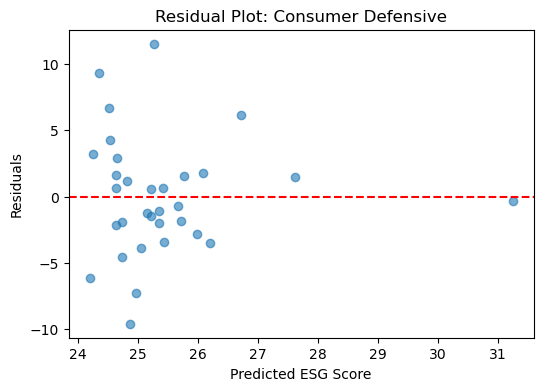

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.30883e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Sector: Energy
  R^2 Score: 0.28
  Mean Squared Error: 44.09
  Coefficients: {'P/E Ratio': -0.029536407407429962, 'Forward P/E': -0.3593237682217565, 'Revenue (TTM)': 1.8487823027987465e-12, 'Net Income': 4.185446156459506e-10}



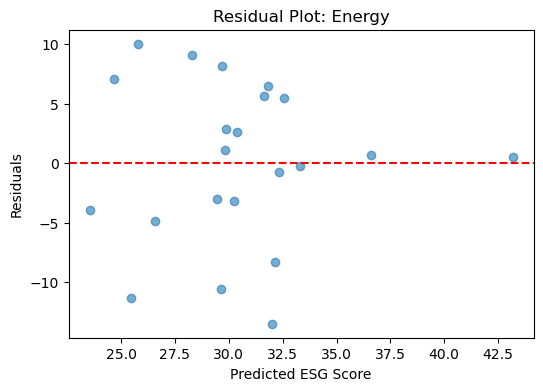

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.98265e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Sector: Financial Services
  R^2 Score: 0.20
  Mean Squared Error: 12.94
  Coefficients: {'P/E Ratio': -0.22143868961243968, 'Forward P/E': 0.2075029425810356, 'Revenue (TTM)': 2.3096452959907726e-11, 'Net Income': -2.984995243081573e-10}



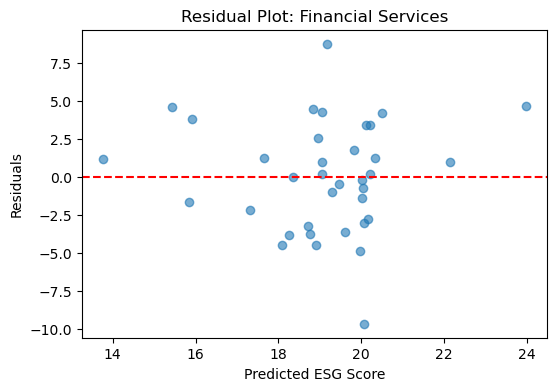

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.3155e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Sector: Healthcare
  R^2 Score: 0.13
  Mean Squared Error: 21.20
  Coefficients: {'P/E Ratio': 0.0025687038892176837, 'Forward P/E': -0.051980091474169765, 'Revenue (TTM)': -1.944802923272128e-11, 'Net Income': 1.1292714725819904e-10}



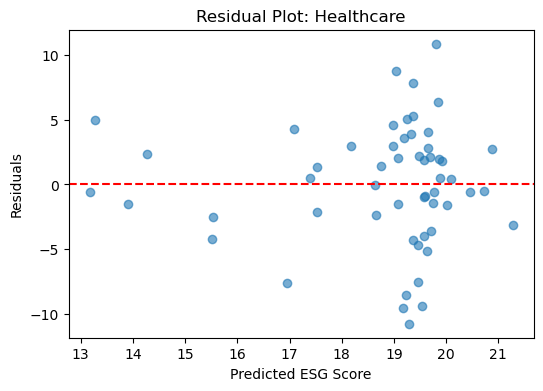

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.91719e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Sector: Industrials
  R^2 Score: 0.06
  Mean Squared Error: 38.04
  Coefficients: {'P/E Ratio': 0.11551210168983549, 'Forward P/E': -0.13448415063591657, 'Revenue (TTM)': 1.9867421171072375e-11, 'Net Income': 6.600050212829414e-10}



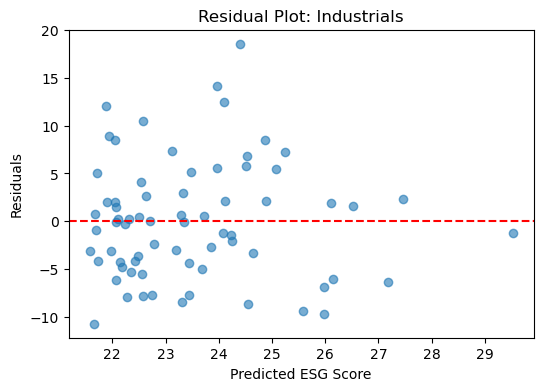

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.62987e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Sector: Real Estate
  R^2 Score: 0.14
  Mean Squared Error: 4.90
  Coefficients: {'P/E Ratio': 0.0015736346913255398, 'Forward P/E': -0.004508338582065414, 'Revenue (TTM)': -1.0787860825538319e-10, 'Net Income': -3.9060040865978185e-10}



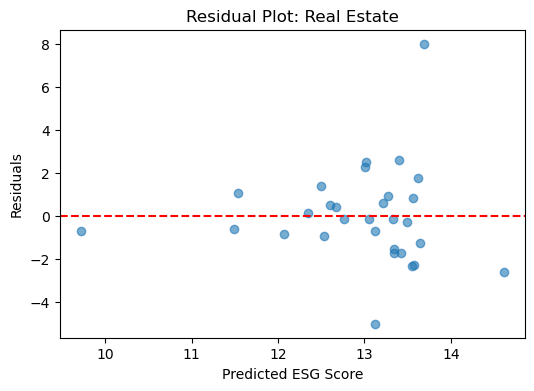

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.42412e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Sector: Technology
  R^2 Score: 0.04
  Mean Squared Error: 20.13
  Coefficients: {'P/E Ratio': -0.003217606868192907, 'Forward P/E': 0.0372055149554602, 'Revenue (TTM)': -1.435236451532661e-11, 'Net Income': 3.554647093306429e-11}



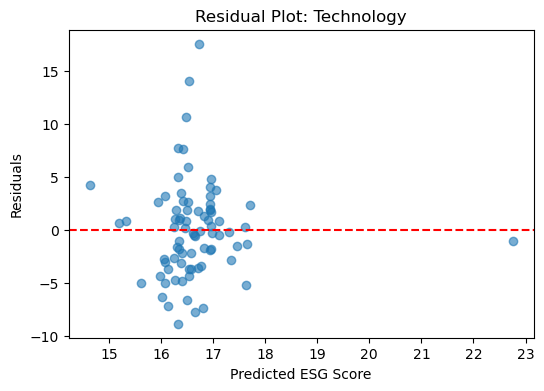

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.64999e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Sector: Utilities
  R^2 Score: 0.09
  Mean Squared Error: 17.10
  Coefficients: {'P/E Ratio': -0.07508003445280483, 'Forward P/E': 0.1549461214288389, 'Revenue (TTM)': 2.7939997317659886e-10, 'Net Income': -1.1183060538874964e-09}



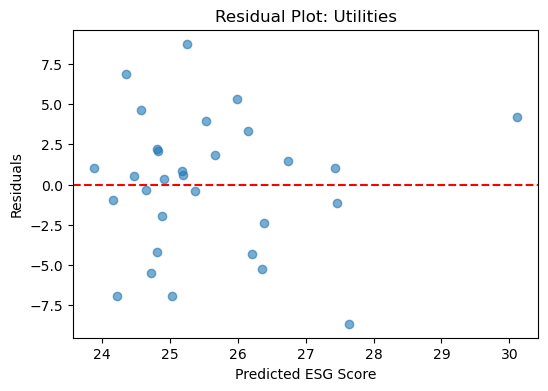

In [157]:
# looping by sector 
for sector, group in data.groupby('Sector'):
    
    X = group[['P/E Ratio', 'Forward P/E', 'Revenue (TTM)', 'Net Income']]
    y = group['ESG score']
    
    if len(group) >= 5 and y.nunique() > 1:
        model = Ridge(alpha=1.0)
        model.fit(X, y)
        y_pred = model.predict(X)
        residuals = y - y_pred

        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)

        print(f"Sector: {sector}")
        print(f"  R^2 Score: {r2:.2f}")
        print(f"  Mean Squared Error: {mse:.2f}")
        print(f"  Coefficients: {dict(zip(X.columns, model.coef_))}\n")

        # plot
        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f'Residual Plot: {sector}')
        plt.xlabel('Predicted ESG Score')
        plt.ylabel('Residuals')
        plt.show()
    
    else:
        print(f"Sector: {sector} — Skipped (insufficient or constant target data)\n")

### That didnt help much so lets standardize the ridge regression  

Sector: Basic Materials
  R^2 Score: 0.43
  Mean Squared Error: 23.80
  Coefficients: {'P/E Ratio': -1.1153403356295533, 'Forward P/E': -0.5651367587093102, 'Revenue (TTM)': -1.5044294737551716, 'Net Income': -3.296932237391385}



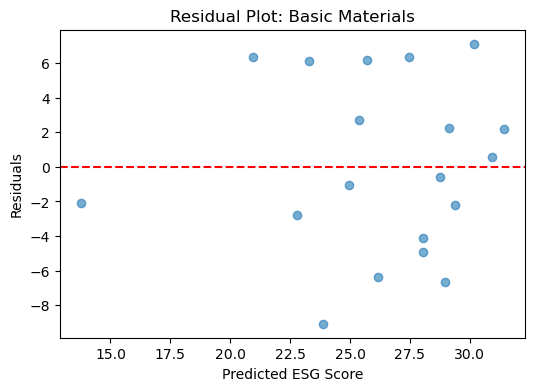

Sector: Communication Services
  R^2 Score: 0.50
  Mean Squared Error: 17.06
  Coefficients: {'P/E Ratio': -0.02514475244183222, 'Forward P/E': 1.6626979970027993, 'Revenue (TTM)': 2.6383232844205446, 'Net Income': 1.3900510282396363}



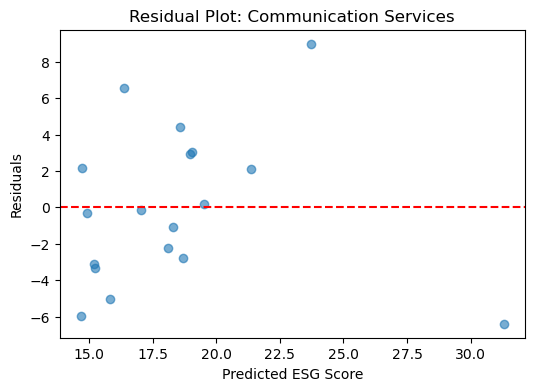

Sector: Consumer Cyclical
  R^2 Score: 0.11
  Mean Squared Error: 28.21
  Coefficients: {'P/E Ratio': -0.27931248541925624, 'Forward P/E': 1.0860858717991955, 'Revenue (TTM)': 2.736814503829054, 'Net Income': -1.4008700529845326}



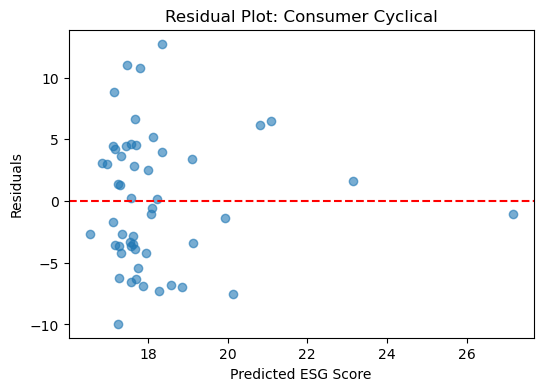

Sector: Consumer Defensive
  R^2 Score: 0.08
  Mean Squared Error: 19.49
  Coefficients: {'P/E Ratio': -0.12133009482844889, 'Forward P/E': 1.332135583327129, 'Revenue (TTM)': -0.35838804736975066, 'Net Income': -0.11479536815339811}



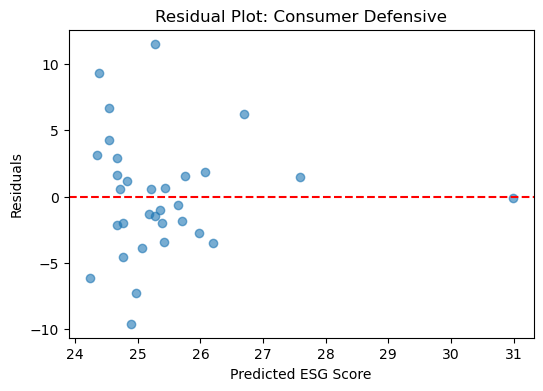

Sector: Energy
  R^2 Score: 0.28
  Mean Squared Error: 44.14
  Coefficients: {'P/E Ratio': -0.6417023775913867, 'Forward P/E': -1.7949031430008957, 'Revenue (TTM)': 0.49587117328503083, 'Net Income': 2.608020834213065}



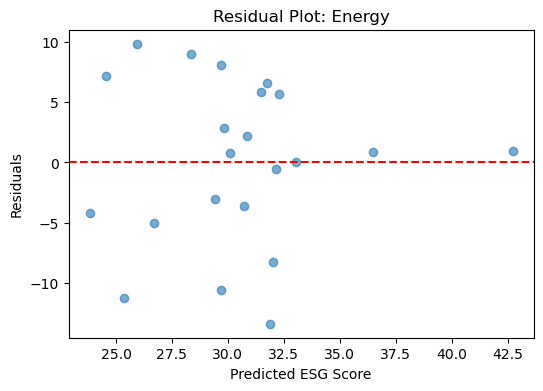

Sector: Financial Services
  R^2 Score: 0.20
  Mean Squared Error: 12.98
  Coefficients: {'P/E Ratio': -2.2101851674353212, 'Forward P/E': 1.482106665592431, 'Revenue (TTM)': 0.42956631277723134, 'Net Income': -1.0591162530971523}



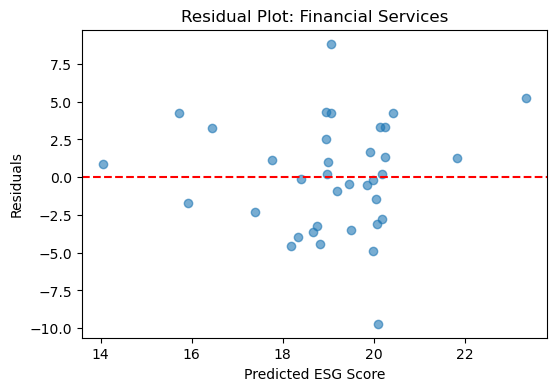

Sector: Healthcare
  R^2 Score: 0.13
  Mean Squared Error: 21.21
  Coefficients: {'P/E Ratio': 0.24029127258532645, 'Forward P/E': -0.5968442117012799, 'Revenue (TTM)': -1.8757978242311313, 'Net Income': 0.5516704747094938}



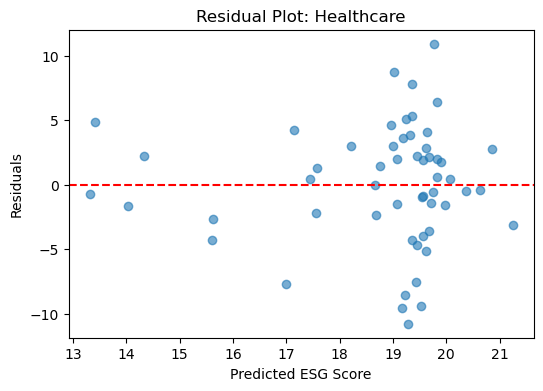

Sector: Industrials
  R^2 Score: 0.06
  Mean Squared Error: 38.05
  Coefficients: {'P/E Ratio': 1.5493812732108532, 'Forward P/E': -1.4064523148904833, 'Revenue (TTM)': 0.48585651516072365, 'Net Income': 1.2215118408196863}



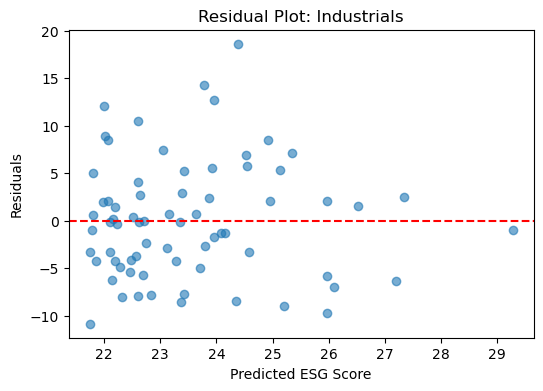

Sector: Real Estate
  R^2 Score: 0.14
  Mean Squared Error: 4.90
  Coefficients: {'P/E Ratio': 0.211178484998952, 'Forward P/E': -0.3127347620307691, 'Revenue (TTM)': -0.6425143708991918, 'Net Income': -0.3554012529946789}



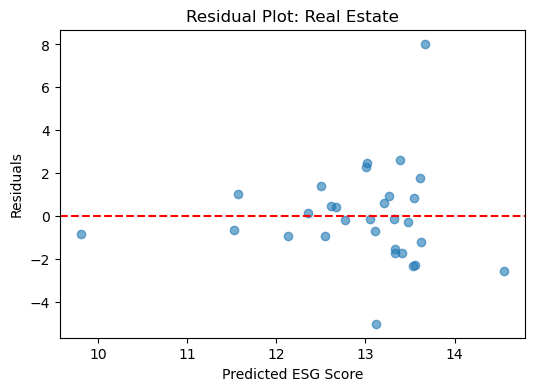

Sector: Technology
  R^2 Score: 0.04
  Mean Squared Error: 20.13
  Coefficients: {'P/E Ratio': -0.2454863837352923, 'Forward P/E': 0.9208282419607308, 'Revenue (TTM)': -0.6845675233763308, 'Net Income': 0.49019733458349674}



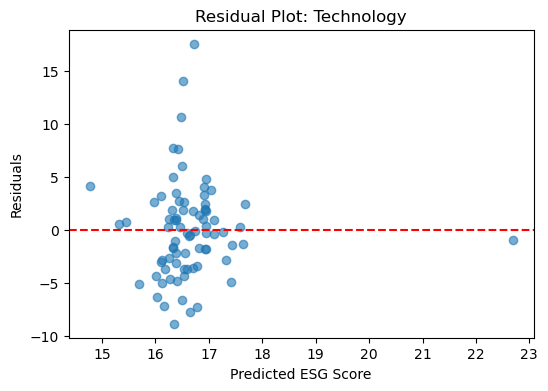

Sector: Utilities
  R^2 Score: 0.09
  Mean Squared Error: 17.13
  Coefficients: {'P/E Ratio': -0.33416144522759716, 'Forward P/E': 0.5559741076131888, 'Revenue (TTM)': 1.8114657307864581, 'Net Income': -1.1124377839968989}



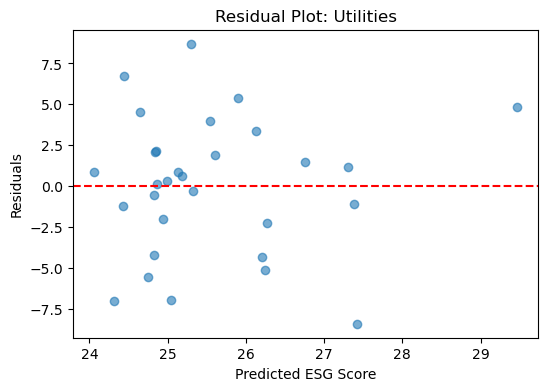

In [155]:
for sector, group in data.groupby('Sector'):

    X = group[['P/E Ratio', 'Forward P/E', 'Revenue (TTM)', 'Net Income']]
    y = group['ESG score']
    
    if len(group) >= 5 and y.nunique() > 1:
        # scaling the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # still using the ridge     
        model = Ridge(alpha=1.0)
        model.fit(X_scaled, y)

        y_pred = model.predict(X_scaled)
        residuals = y - y_pred

        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)

        print(f"Sector: {sector}")
        print(f"  R^2 Score: {r2:.2f}")
        print(f"  Mean Squared Error: {mse:.2f}")
        print(f"  Coefficients: {dict(zip(X.columns, model.coef_))}\n")

        # plot
        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f'Residual Plot: {sector}')
        plt.xlabel('Predicted ESG Score')
        plt.ylabel('Residuals')
        plt.show()

    else:
        print(f"Sector: {sector} — Skipped (insufficient or constant target data)\n")

### Now we are going to try one more thing, switching revenue with Market Cap and scaling with standard_scalar which is usually important when P/E and market cap are so different 

In [153]:
for sector, group in data.groupby('Sector'):
    # redefine X and y with Market Cap and not Revenue
    X = group[['P/E Ratio', 'Forward P/E', 'Market Cap', 'Net Income']]
    y = group['ESG score']

    if len(group) >= 5 and y.nunique() > 1:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        model = LinearRegression()
        model.fit(X_scaled, y)
        
        y_pred = model.predict(X_scaled)
        residuals = y - y_pred
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        
        print(f"Sector: {sector}")
        print(f"  R^2 Score: {r2:.2f}")
        print(f"  Mean Squared Error: {mse:.2f}")
        print(f"  Coefficients: {dict(zip(X.columns, model.coef_))}\n")

Sector: Basic Materials
  R^2 Score: 0.40
  Mean Squared Error: 25.07
  Coefficients: {'P/E Ratio': -1.7563045913817685, 'Forward P/E': 0.369179330910117, 'Market Cap': -0.4240347026317683, 'Net Income': -4.110579311327251}

Sector: Communication Services
  R^2 Score: 0.47
  Mean Squared Error: 17.89
  Coefficients: {'P/E Ratio': -0.26746202001146185, 'Forward P/E': 1.9286141661762786, 'Market Cap': -4.048322509326235, 'Net Income': 7.893370955699682}

Sector: Consumer Cyclical
  R^2 Score: 0.09
  Mean Squared Error: 28.69
  Coefficients: {'P/E Ratio': 2.545405410807199, 'Forward P/E': -0.1481709685057615, 'Market Cap': -5.476064387243051, 'Net Income': 6.252538639907818}

Sector: Consumer Defensive
  R^2 Score: 0.07
  Mean Squared Error: 19.55
  Coefficients: {'P/E Ratio': -0.20690553411394735, 'Forward P/E': 1.3791394900893126, 'Market Cap': -0.07704267429132315, 'Net Income': -0.2935508357286385}

Sector: Energy
  R^2 Score: 0.28
  Mean Squared Error: 43.88
  Coefficients: {'P/E Rat

### Trying another model, this time leaving the P/E ratio unscaled, taking out forward p/e due to potential data leakage, and taking out net income

Sector: Basic Materials
  R^2 Score: 0.31
  Mean Squared Error: 28.90
  Coefficients: {'P/E Ratio': -0.025112266915637983, 'Log Market Cap': -4.693632021211527}



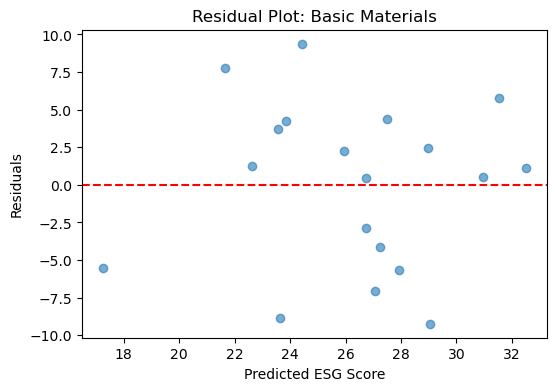

Sector: Communication Services
  R^2 Score: 0.56
  Mean Squared Error: 14.86
  Coefficients: {'P/E Ratio': 0.0005148663733172286, 'Log Market Cap': 2.7688857201535977}



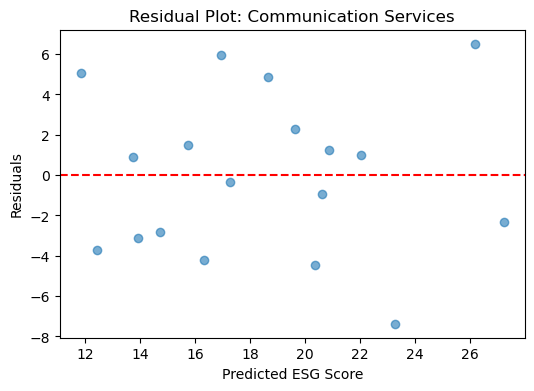

Sector: Consumer Cyclical
  R^2 Score: 0.08
  Mean Squared Error: 29.00
  Coefficients: {'P/E Ratio': 0.0006029892813444811, 'Log Market Cap': 1.3782941323790432}



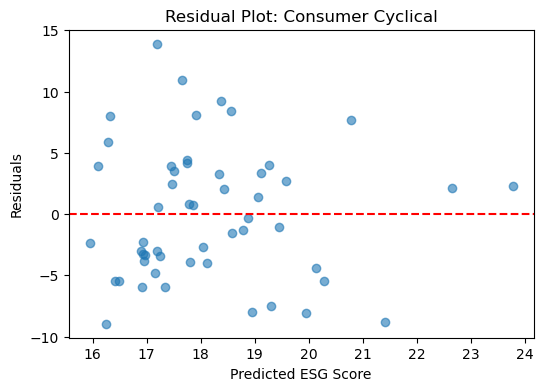

Sector: Consumer Defensive
  R^2 Score: 0.01
  Mean Squared Error: 20.90
  Coefficients: {'P/E Ratio': 0.0448072732726679, 'Log Market Cap': -0.20093140147684938}



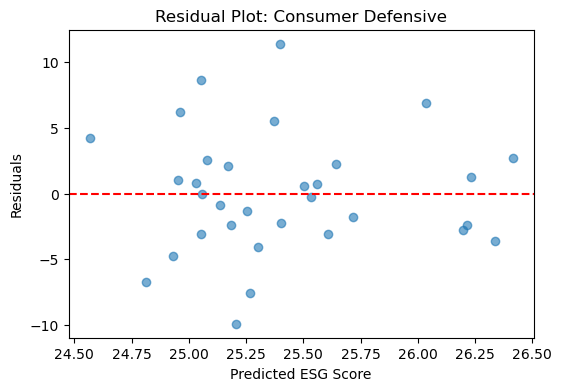

Sector: Energy
  R^2 Score: 0.13
  Mean Squared Error: 53.42
  Coefficients: {'P/E Ratio': -0.1233254308084585, 'Log Market Cap': 1.6671994132160126}



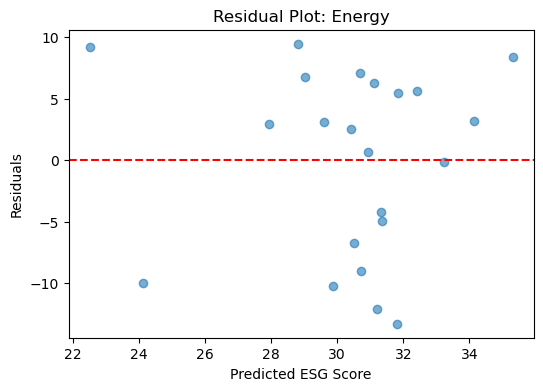

Sector: Financial Services
  R^2 Score: 0.15
  Mean Squared Error: 13.83
  Coefficients: {'P/E Ratio': -0.08570275970865787, 'Log Market Cap': -0.8494387927373376}



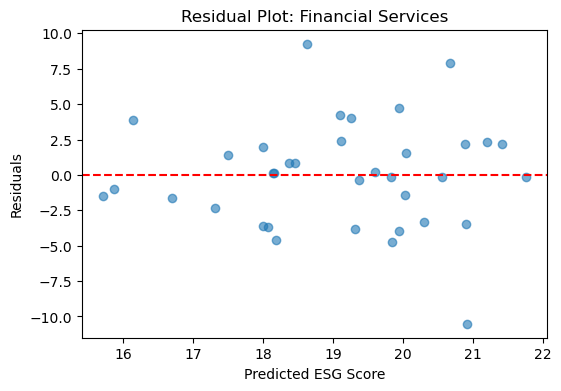

Sector: Healthcare
  R^2 Score: 0.01
  Mean Squared Error: 24.15
  Coefficients: {'P/E Ratio': 0.0041868778738676895, 'Log Market Cap': -0.25540860993516634}



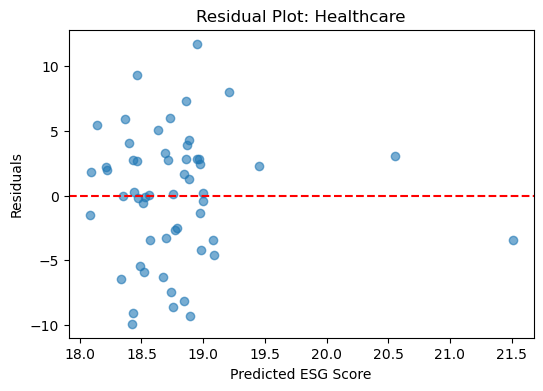

Sector: Industrials
  R^2 Score: 0.01
  Mean Squared Error: 40.35
  Coefficients: {'P/E Ratio': -0.01953679207142142, 'Log Market Cap': 0.6306372173773769}



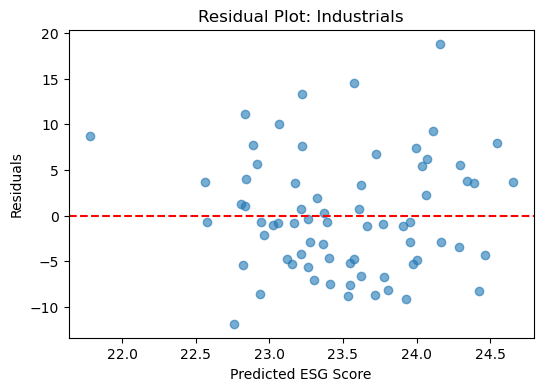

Sector: Real Estate
  R^2 Score: 0.01
  Mean Squared Error: 5.59
  Coefficients: {'P/E Ratio': 0.0018931927070011492, 'Log Market Cap': -0.06171699106009843}



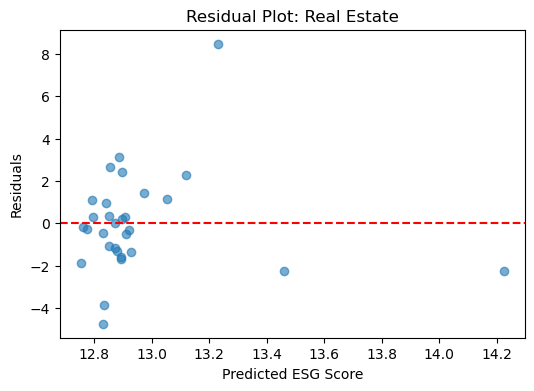

Sector: Technology
  R^2 Score: 0.02
  Mean Squared Error: 20.50
  Coefficients: {'P/E Ratio': 0.005753296218445619, 'Log Market Cap': -0.32003408425510393}



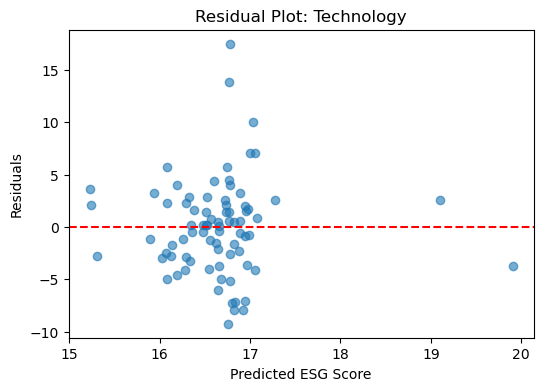

Sector: Utilities
  R^2 Score: 0.02
  Mean Squared Error: 18.42
  Coefficients: {'P/E Ratio': -0.08470708654803588, 'Log Market Cap': 0.9143204409605472}



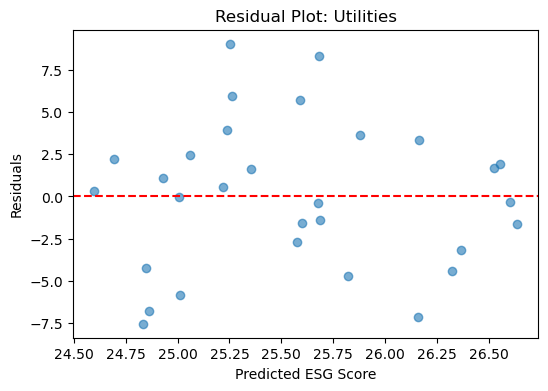

In [160]:
for sector, group in data.groupby('Sector'):
    # new columns we are using 
    group = group[['P/E Ratio', 'Market Cap','ESG score', ]]

    # dropping any potential NaN's
    group = group.dropna()

    # keeping only positive Market Cap since we are going to log of Market Cap
    group = group[(group['Market Cap'] > 0)]
    group['Log Market Cap'] = np.log(group['Market Cap'])

    # redefining columns because of the new log column. Also dropping NaN's
    group = group[['P/E Ratio','Log Market Cap', 'ESG score']].dropna()

    # defining x and y 
    X = group[['P/E Ratio', 'Log Market Cap']]
    y = group['ESG score']

    if len(group) >= 5 and y.nunique() > 1:
        model = LinearRegression()
        model.fit(X, y)

        y_pred = model.predict(X)
        residuals = y - y_pred
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)

        print(f"Sector: {sector}")
        print(f"  R^2 Score: {r2:.2f}")
        print(f"  Mean Squared Error: {mse:.2f}")
        print(f"  Coefficients: {dict(zip(X.columns, model.coef_))}\n")

        # plot
        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f'Residual Plot: {sector}')
        plt.xlabel('Predicted ESG Score')
        plt.ylabel('Residuals')
        plt.show()
    
    else:
        print(f"Sector: {sector} — Skipped (insufficient or constant target data)\n")

### last resort: running a linear regression combining all the sectors 

In [187]:
# set features and define X and Y
features = ['P/E Ratio', 'Forward P/E', 'Revenue (TTM)', 'Net Income']
X = data[features]
y = data['ESG score']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Linear Regression Results:")
print(f"  R^2 Score: {r2:.2f}")
print(f"  Mean Squared Error: {mse:.2f}")
print("  Coefficients:")
for feat, coef in zip(features, lin_reg.coef_):
    print(f"    {feat}: {coef:.4f}")

Linear Regression Results:
  R^2 Score: 0.02
  Mean Squared Error: 45.70
  Coefficients:
    P/E Ratio: -0.0004
    Forward P/E: -0.0295
    Revenue (TTM): 0.0000
    Net Income: 0.0000


### Trying to finding if any of the features are more important than the other

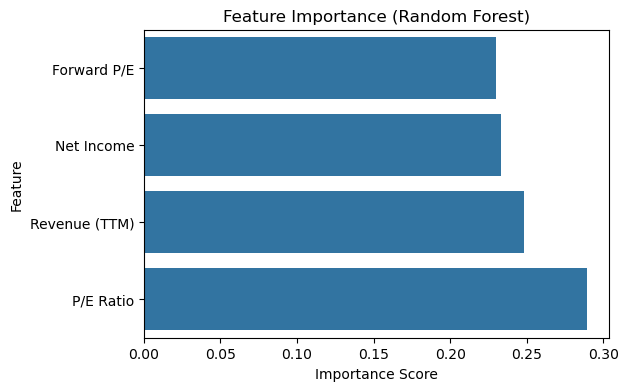

In [190]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values()

# plotting the importance 
plt.figure(figsize=(6, 4))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#### Looking at the chart of feature importance for finding ESG scores, we found that P/E Ratio is the most predictive feature among the financial variables tested. Although, Revenue (TTM), Net Income, and Forward P/E also contributed meaningfully. This implies that the P/E ratio may have a stronger association with ESG performance than company size or profitability. This chart also shows that we chose good features being that they all contribute a realatively similar amount!